<a href="https://colab.research.google.com/github/KhaledAlsayedAbdulhalim/KhaledAlsayedAbdulhalim/blob/main/Heart_disease_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Heart disease Project

The dataset is available on the Kaggle website, and it is from an ongoing ongoing cardiovascular study on residents of the town of *Framingham*, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients information. It includes over 4,000 records and 15 attributes.

## Imports
** Import pandas, numpy, matplotlib,and seaborn.
(also as going throught the project you can import some libiraries as sklearn as you need it.)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

## Get the Data

We'll work with the csv file. It has residents info, such as gender (as the male value is =1 and for female =0), age, and their education . as also the dataset doesn't contain categorical attributes:

* Behavioural data

currentSmoker: whether or not the patient is a current smoker.

cigsPerDay: the number of cigarettes that the person smoked on average in one day.

* Medical( history):

BPMeds: whether or not the patient was on blood pressure medication

prevalentStroke: whether or not the patient had previously had a stroke

prevalentHyp: whether or not the patient was hypertensive

diabetes: whether or not the patient had diabetes

* Medical(current):

totChol: total cholesterol level

sysBP: systolic blood pressure

diaBP: diastolic blood pressure
BMI: Body Mass Index

heartRate: heart rate

glucose: glucose level

* Predict variable (desired target):

10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

** Reading the data.
then representing the head part of the data**

## Reading and Exploring the data

In [ ]:
heart_df=pd.read_csv("/content/framingham.csv")
heart_df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

**check out its info() and describe() methods.**

In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
heart_df.shape

(4238, 16)

In [ ]:
heart_df.describe().T

count        mean        std     min     25%    50%  \
male             4238.0    0.429212   0.495022    0.00    0.00    0.0   
age              4238.0   49.584946   8.572160   32.00   42.00   49.0   
education        4133.0    1.978950   1.019791    1.00    1.00    2.0   
currentSmoker    4238.0    0.494101   0.500024    0.00    0.00    0.0   
cigsPerDay       4209.0    9.003089  11.920094    0.00    0.00    0.0   
BPMeds           4185.0    0.029630   0.169584    0.00    0.00    0.0   
prevalentStroke  4238.0    0.005899   0.076587    0.00    0.00    0.0   
prevalentHyp     4238.0    0.310524   0.462763    0.00    0.00    0.0   
diabetes         4238.0    0.025720   0.158316    0.00    0.00    0.0   
totChol          4188.0  236.721585  44.590334  107.00  206.00  234.0   
sysBP            4238.0  132.352407  22.038097   83.50  117.00  128.0   
diaBP            4238.0   82.893464  11.910850   48.00   75.00   82.0   
BMI              4219.0   25.802008   4.080111   15.54   23.07   25.4   
heartRate        4237.0   75.878924  12.026596   44.00   68.00   75.0   
glucose          3850.0   81.966753  23.959998   40.00   71.00   78.0   
TenYearCHD       4238.0    0.151958   0.359023    0.00    0.00    0.0   

                     75%    max  
male               1.000    1.0  
age               56.000   70.0  
education          3.000    4.0  
currentSmoker      1.000    1.0  
cigsPerDay        20.000   70.0  
BPMeds             0.000    1.0  
prevalentStroke    0.000    1.0  
prevalentHyp       1.000    1.0  
diabetes           0.000    1.0  
totChol          263.000  696.0  
sysBP            144.000  295.0  
diaBP             89.875  142.5  
BMI               28.040   56.8  
heartRate         83.000  143.0  
glucose           87.000  394.0  
TenYearCHD         0.000    1.0

**first of all education attribute is not essintial for the prediction**




In [ ]:
#we are going to drop (education) column

heart_df.drop(['education'],axis=1,inplace=True)

In [ ]:
#checking that (education) column is removed
heart_df.head()

male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39              0         0.0     0.0                0   
1     0   46              0         0.0     0.0                0   
2     1   48              1        20.0     0.0                0   
3     0   61              1        30.0     0.0                0   
4     0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [ ]:
#renaming the (male) column to (Sex) to be more expressive
# 1 for male
# 0 for female

heart_df.rename(columns={'male':'Sex'},inplace=True)


In [ ]:
#checking if there is any missing values
heart_df.isnull().any()

Sex                False
age                False
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

In [ ]:
#as we checked that there is missing values so we want to know there amount
heart_df.isnull().sum()

Sex                  0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
#knowing the number of columns and the rows that contain a missing value
count=0
for i in heart_df.isnull().sum():
    if i>0:
        count=count+1
print('Total number of columns with missing values is ', count)

count=0
for i in heart_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)

Total number of columns with missing values is  6
Total number of rows with missing values is  489


In [ ]:
#handling the missing values by droping it
heart_df.dropna(axis=0,inplace=True)

In [ ]:
#checking that the missing values are handled
heart_df.isnull().sum()

Sex                0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## some data visualizations

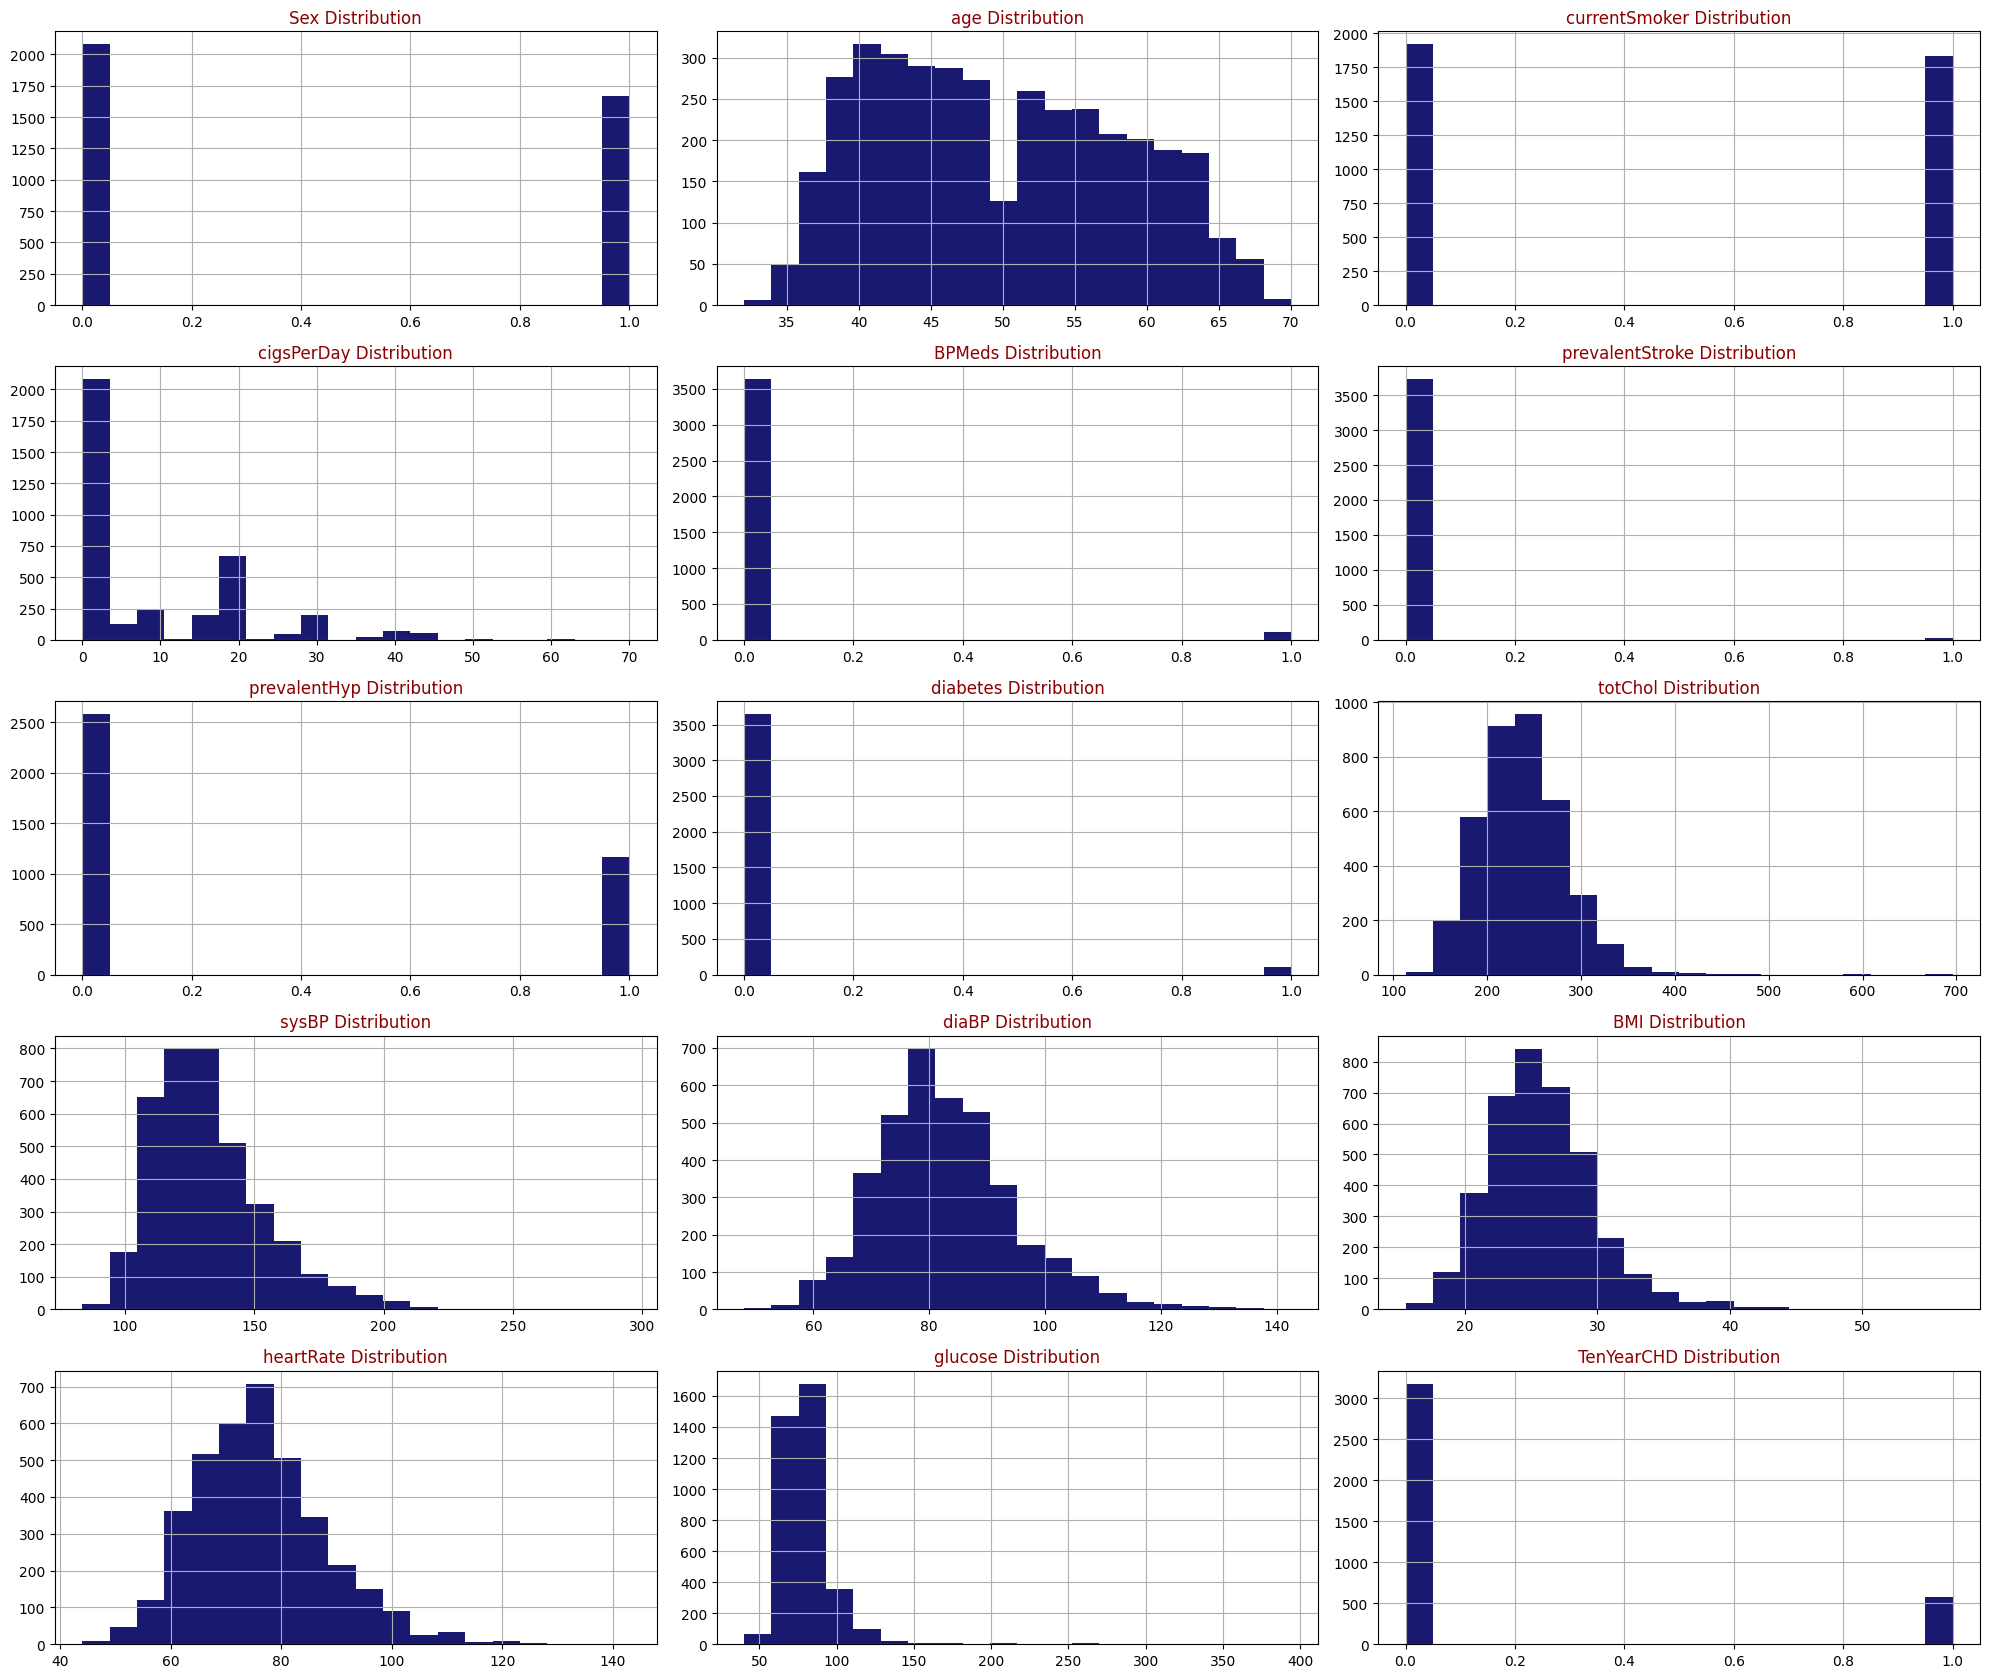

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')

    fig.tight_layout()
    plt.show()
draw_histograms(heart_df,heart_df.columns,6,3)

In [ ]:
heart_df.TenYearCHD.value_counts()

0    3177
1     572
Name: TenYearCHD, dtype: int64

<Axes: xlabel='TenYearCHD', ylabel='count'>

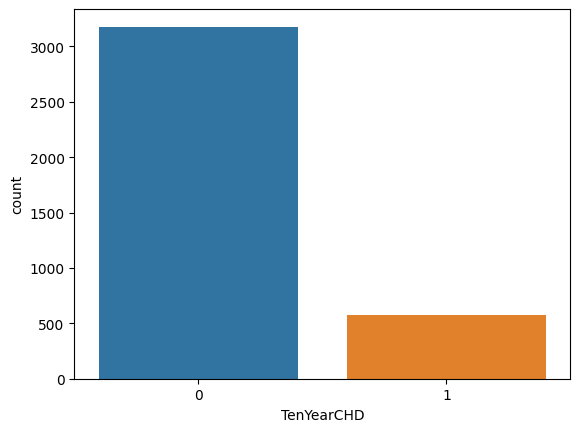

In [ ]:
sns.countplot(x='TenYearCHD',data=heart_df)

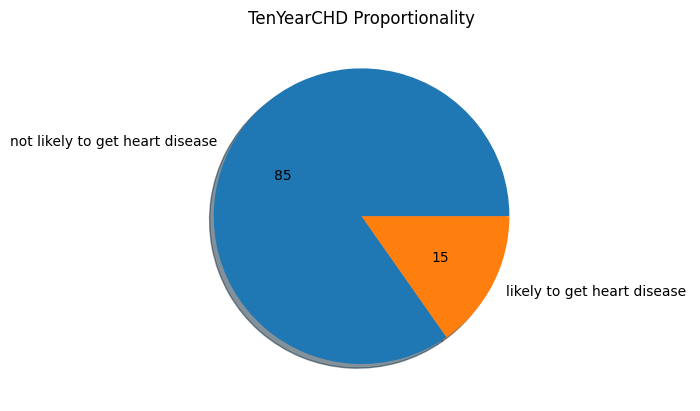

In [ ]:
plt.pie(heart_df.TenYearCHD.value_counts(),
        labels= ['not likely to get heart disease', 'likely to get heart disease '], autopct='%.f',
        shadow=True)

plt.title('TenYearCHD Proportionality')
plt.show()

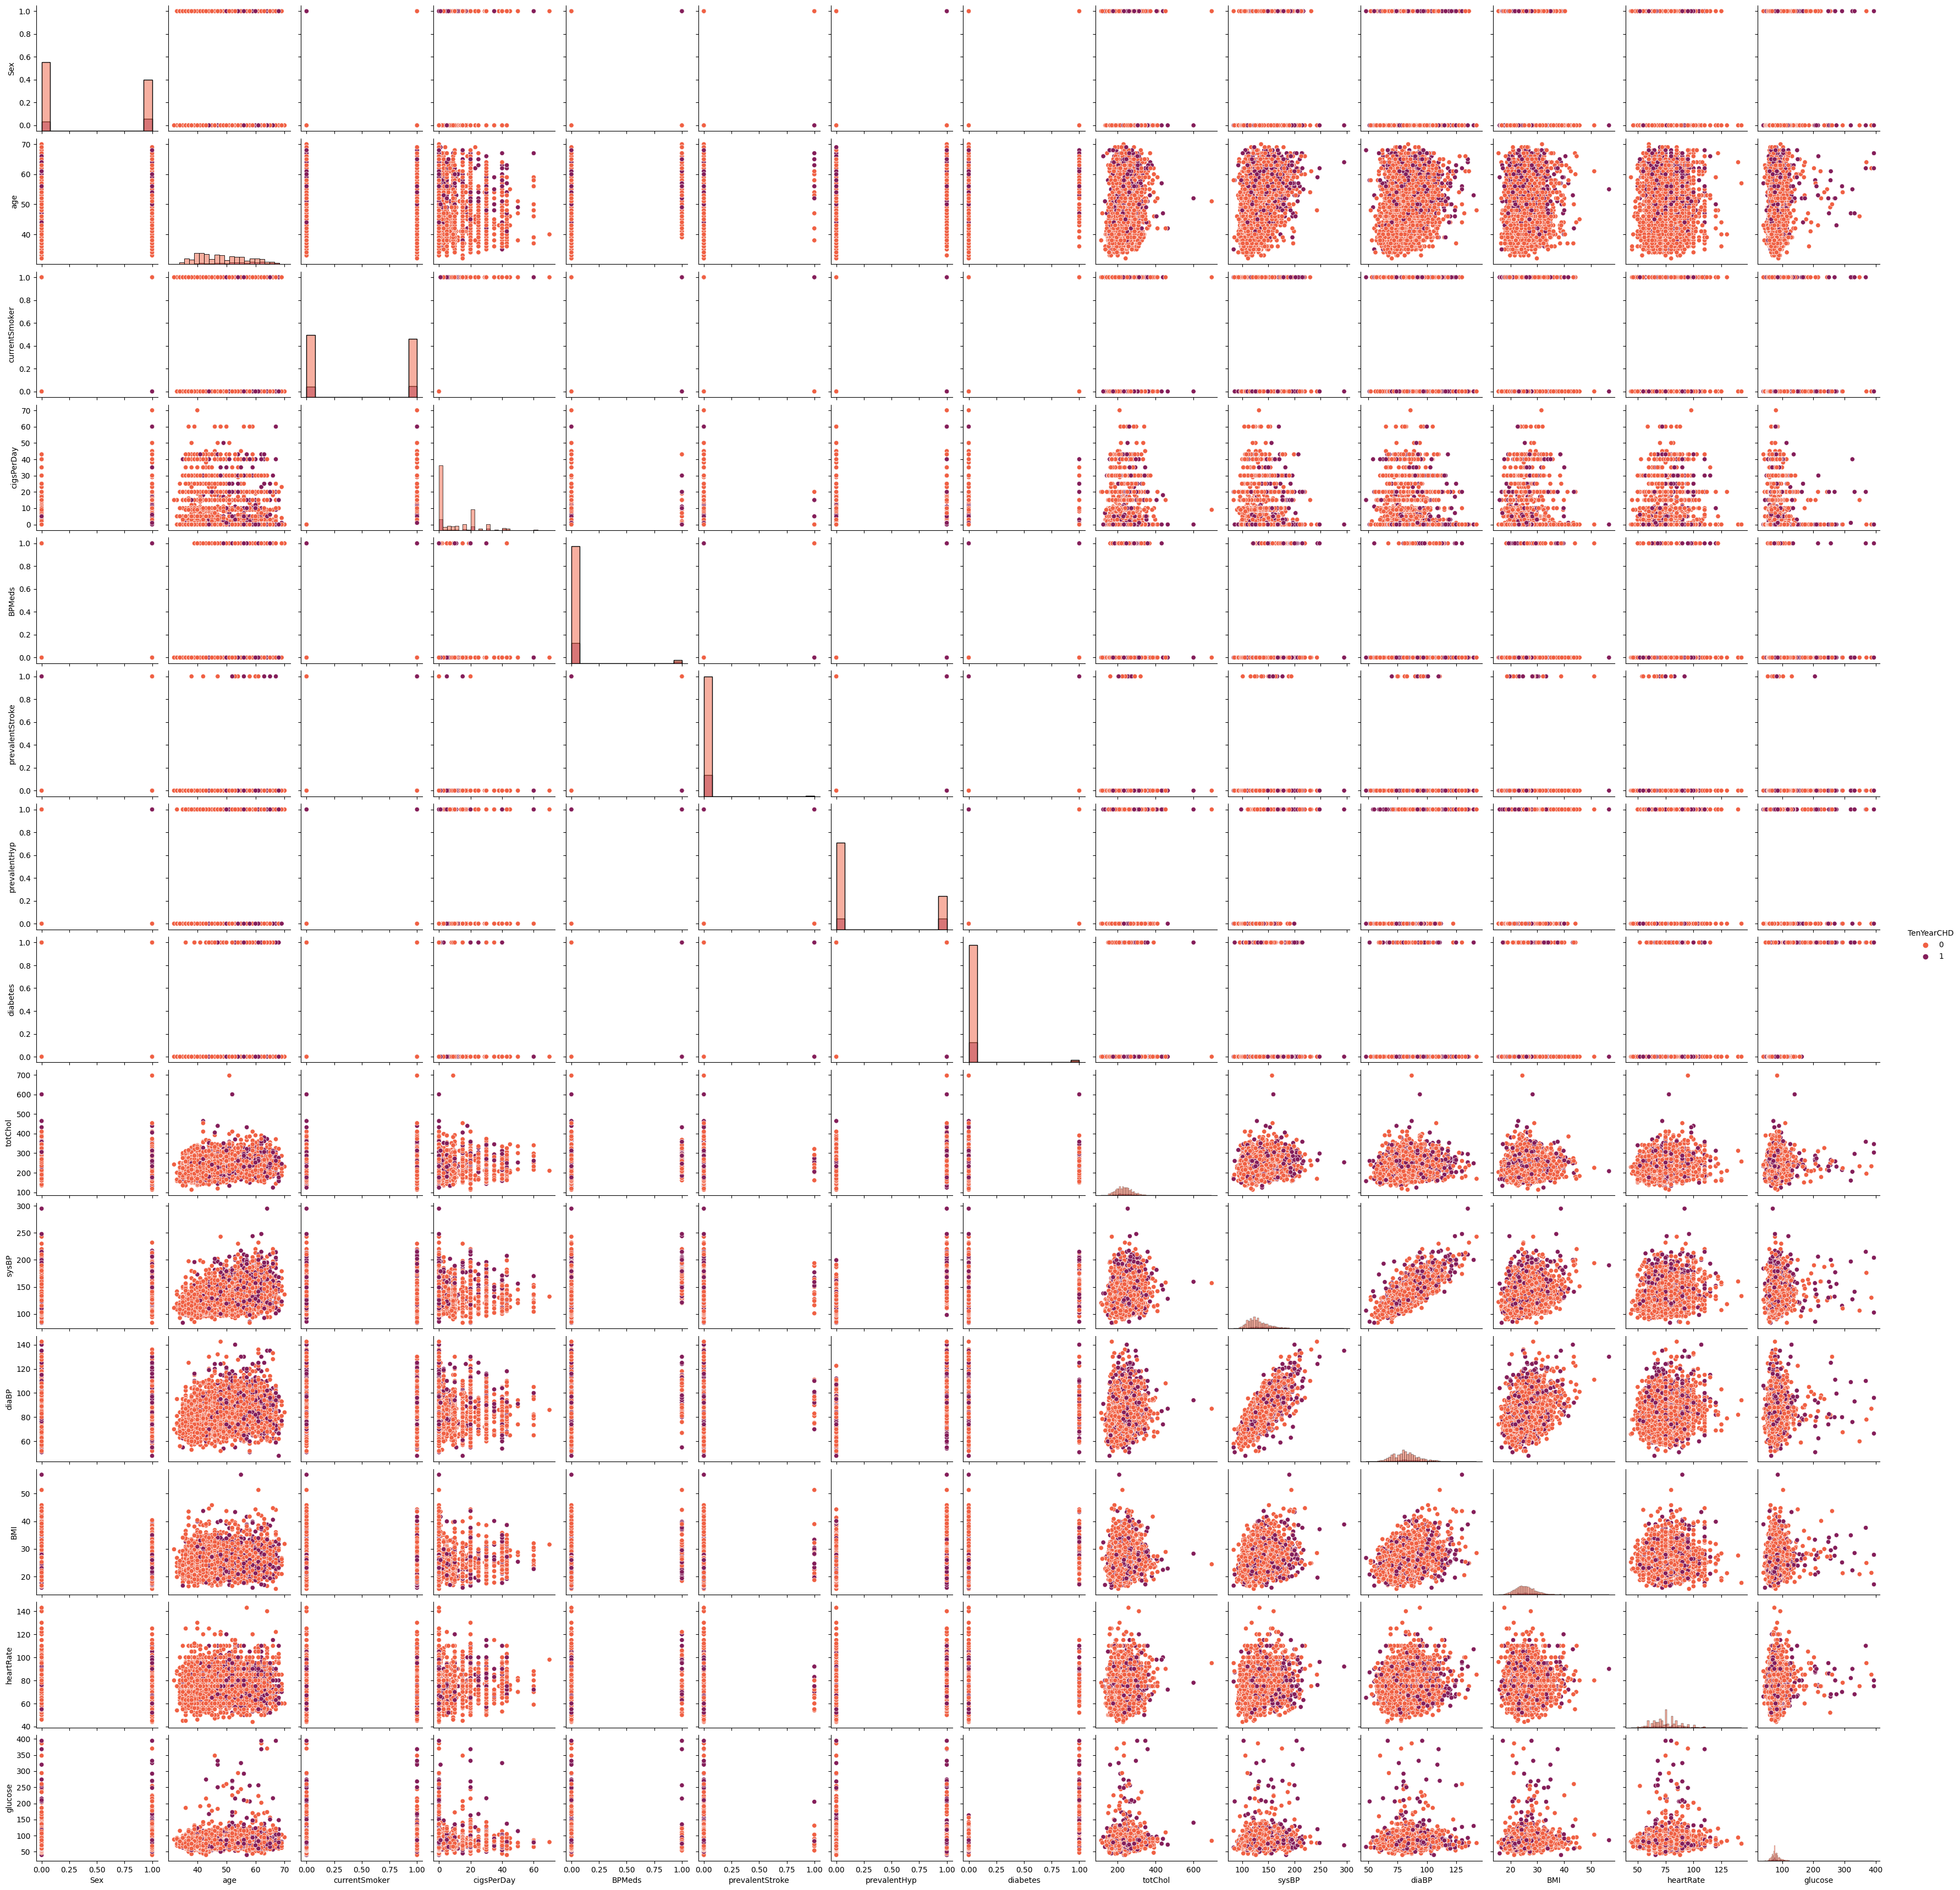

In [ ]:
sns.pairplot(data=heart_df ,hue="TenYearCHD", diag_kind="hist",palette='rocket_r')

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.


In [ ]:
new_features=heart_df[['age','Sex','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

In [ ]:
x_train.head()

age  Sex  cigsPerDay  totChol  sysBP  glucose
1820   55    0         5.0    280.0  144.0     75.0
2979   45    0         0.0    258.0  148.5     90.0
3247   51    1        40.0    212.0  122.5     74.0
1191   60    1        20.0    260.0  178.0     79.0
146    59    0         1.0    259.0  141.0     86.0

In [ ]:
x_train

age  Sex  cigsPerDay  totChol  sysBP  glucose
1820   55    0         5.0    280.0  144.0     75.0
2979   45    0         0.0    258.0  148.5     90.0
3247   51    1        40.0    212.0  122.5     74.0
1191   60    1        20.0    260.0  178.0     79.0
146    59    0         1.0    259.0  141.0     86.0
...   ...  ...         ...      ...    ...      ...
3612   49    0         0.0    308.0  128.0     70.0
3452   42    0         9.0    195.0  126.0     77.0
1944   39    0         0.0    220.0  137.5     88.0
2549   64    0         0.0    266.0  166.0     87.0
3306   56    1         0.0    193.0  114.0     88.0

[2999 rows x 6 columns]

In [ ]:
x.shape

(3749, 6)

In [ ]:
y.shape

(3749,)

In [ ]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

## preprocessing


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
xtrain_scaled=scaler.fit_transform(x_train)
xtest_scaled=scaler.transform(x_test)

In [ ]:
xtrain_scaled

array([[ 0.62029666, -0.89147837, -0.33392266,  0.94261778,  0.5201327 ,
        -0.29126643],
       [-0.54157311, -0.89147837, -0.75101306,  0.45402854,  0.7247665 ,
         0.35750661],
       [ 0.15554875,  1.1217322 ,  2.58571016, -0.56756715, -0.45756212,
        -0.33451796],
       ...,
       [-1.23869496, -0.89147837, -0.75101306, -0.38989833,  0.22455055,
         0.27100354],
       [ 1.66597945, -0.89147837, -0.75101306,  0.63169735,  1.52056461,
         0.227752  ],
       [ 0.73648363,  1.1217322 , -0.75101306, -0.98953058, -0.84409263,
         0.27100354]])

In [ ]:
xtest_scaled

array([[ 1.78216642,  1.1217322 , -0.75101306, -0.72302736, -1.20788605,
         0.227752  ],
       [ 1.8983534 , -0.89147837, -0.75101306,  0.78715757,  2.93026412,
        -0.07500875],
       [ 0.73648363,  1.1217322 , -0.75101306, -1.34486821, -0.38935085,
         0.27100354],
       ...,
       [-0.30919915, -0.89147837, -0.75101306,  0.92040918,  0.99761157,
        -0.94003947],
       [-1.12250799,  1.1217322 , -0.75101306, -2.23321229, -0.25292832,
        -0.46427257],
       [ 1.20123154,  1.1217322 , -0.75101306,  0.72053176,  0.56560688,
        -0.3777695 ]])

## Training the Model

Now its time to train our model on our training data!

**Import Logistic Regression from sklearn.linear_model**

In [ ]:
from sklearn.linear_model import LogisticRegression

**Create an instance of a Logistic Regression() .**

In [ ]:
#model
logreg=LogisticRegression()

** Train/fit lm on the training data.**

In [ ]:
#fit
logreg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#predict
y_pred=logreg.predict(x_test)

## model evaluation
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [ ]:
from sklearn import metrics

In [ ]:
acc_s=sklearn.metrics.accuracy_score(y_test,y_pred)
acc_s

0.8706666666666667

In [ ]:
print(mean_squared_error(y_test, y_pred))

0.12933333333333333


not all types of showing the accuracy of the error percentage is good for any type of data

In [ ]:
r2=sklearn.metrics.r2_score(y_test,y_pred)
r2

-0.09167029306282903

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       647
           1       0.80      0.08      0.14       103

    accuracy                           0.87       750
   macro avg       0.84      0.54      0.54       750
weighted avg       0.86      0.87      0.82       750



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [ ]:
print(cm)

[[645   2]
 [ 95   8]]


In [ ]:
y_test.value_counts()

0    647
1    103
Name: TenYearCHD, dtype: int64

<Axes: >

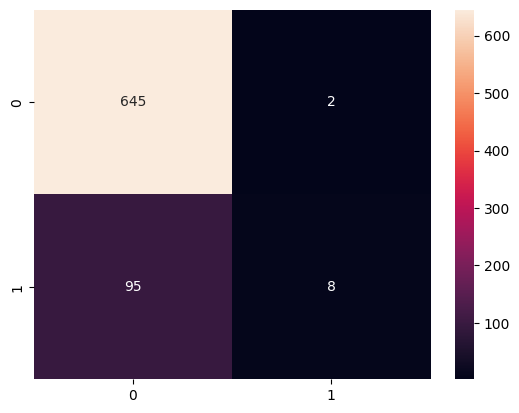

In [ ]:
sns.heatmap(cm, annot=True,fmt='d')

## not all types of model are good for all types of data so we should try a various types of model
**now we are going to try the DecisionTreeClassifier model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
entropy_DT_model = DecisionTreeClassifier(criterion='entropy', max_depth = 10, random_state=0)

In [ ]:
entropy_DT_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [ ]:
dt_pred = entropy_DT_model.predict(x_test)

In [ ]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       647
           1       0.23      0.14      0.17       103

    accuracy                           0.82       750
   macro avg       0.55      0.53      0.53       750
weighted avg       0.78      0.82      0.80       750



**now we are going to try the RandomForestClassifier model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF_model = RandomForestClassifier(n_estimators = 5, criterion = 'entropy')

In [ ]:
RF_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=5)

In [ ]:
rf_pred = RF_model.predict(x_test)

In [ ]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       647
           1       0.32      0.17      0.23       103

    accuracy                           0.84       750
   macro avg       0.60      0.56      0.57       750
weighted avg       0.80      0.84      0.81       750

